In [1]:
%pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 10.4 MB/s eta 0:00:00


In [23]:
from typing import TypedDict

class State(TypedDict):
  graph_state: str
  happy: bool

In [28]:
def node1(state):
  print(f'node 1 : {state}')
  return {'graph_state':state['graph_state']+'I am'}

def node2(state):
  print(f'node 2: {state}')
  return {'graph_state':state['graph_state']+'happy','happy':True}

def node3(state):
  print(f'node 3: {state}')
  return {'graph_state':state['graph_state']+'okay', 'happy':None}

def node4(state):
  print(f'node 4: {state}')
  return {'graph_state':state['graph_state']+'today'}

In [36]:
from typing import Literal
def decide_mood(state) -> Literal['node2','node3']:
  if True:
    return 'node2'
  else:
    return 'node3'

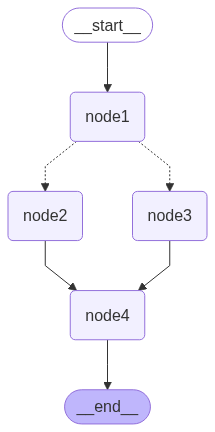

In [37]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)

builder.add_node('node1',node1)
builder.add_node('node2',node2)
builder.add_node('node3',node3)
builder.add_node('node4',node4)

builder.add_edge(START,'node1')
builder.add_conditional_edges('node1',decide_mood)
builder.add_edge('node2','node4')
builder.add_edge('node3','node4')
builder.add_edge('node4',END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [38]:
res = graph.invoke({'graph_state':"Isuru"})
res

node 1 : {'graph_state': 'Isuru'}
node 2: {'graph_state': 'IsuruI am'}
node 4: {'graph_state': 'IsuruI amhappy', 'happy': True}


{'graph_state': 'IsuruI amhappytoday', 'happy': True}

In [39]:
res

{'graph_state': 'IsuruI amhappytoday', 'happy': True}